## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import glob
import matplotlib as plt
from collections import OrderedDict
import random

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
from sklearn.model_selection import train_test_split


from scripts_spyder_eegsignals_ import *

## Subject 1 Data and Events Loading 

In [2]:
path_data_subj1 = "C:\\Users\\amoha\\Downloads\\train\\subj1_data"
path_label_subj1 = "C:\\Users\\amoha\\Downloads\\train\\subj1_events"

path_data_subj2 = "C:\\Users\\amoha\\Downloads\\train\\subj2_data"
path_label_subj2 = "C:\\Users\\amoha\\Downloads\\train\\subj2_events"

subj1_data, subj1_label = [], []
for file in glob.glob(path_data_subj1 + "\\*.csv"):
    subj1_data.append(file)
for file in glob.glob(path_label_subj1 + "\\*.csv"):
    subj1_label.append(file)

subj2_data, subj2_label = [], []
for file in glob.glob(path_data_subj1 + "\\*.csv"):
    subj2_data.append(file)
for file in glob.glob(path_label_subj1 + "\\*.csv"):
    subj2_label.append(file)



all_data = pd.DataFrame()
all_labels = pd.DataFrame()
idx = 0
for i, j in zip(subj1_data, subj1_label):
    dataa = pd.read_csv(f"{i}")
    events = pd.read_csv(f"{j}")
    dataa.drop(["id"], axis=1, inplace=True)
    events.drop(["id"], axis=1, inplace=True)
    all_data = pd.concat([all_data, dataa], ignore_index=True)
    all_labels = pd.concat([all_labels, events], ignore_index=True)
    idx += 1
    print(f"{idx}/{len(subj1_data)}")

all_data2 = pd.DataFrame()
all_labels2 = pd.DataFrame()
idx = 0
for i, j in zip(subj2_data, subj2_label):
    dataa = pd.read_csv(f"{i}")
    events = pd.read_csv(f"{j}")
    dataa.drop(["id"], axis=1, inplace=True)
    events.drop(["id"], axis=1, inplace=True)
    all_data2 = pd.concat([all_data2, dataa], ignore_index=True)
    all_labels2 = pd.concat([all_labels2, events], ignore_index=True)
    idx += 1
    print(f"{idx}/{len(subj1_data)}")


1/8
2/8
3/8
4/8
5/8
6/8
7/8
8/8
1/8
2/8
3/8
4/8
5/8
6/8
7/8
8/8


## Data preprocessing

In [3]:
start_end_data = start_end_data_finder(all_labels)
data_extracted_occurances = np.reshape(data_extractor(start_end_data,all_data),(6*260,150,32) )

no_events_data_extracted = data_extractor_noevent(all_data, all_labels,1560)
final_data = np.empty(1560*150*32)
final_data = np.concatenate((data_extracted_occurances,no_events_data_extracted))
final_data = np.reshape(final_data, (3120,150*32))

class_labels = np.ones(1560)

for i in range(6):
    class_labels[i*260:(i+1)*260] = class_labels[i*260:(i+1)*260] *(i)

noevent_label = np.ones(1560)*(6)

all_class_labels = np.concatenate((class_labels,noevent_label))


In [4]:
start_end_data2 = start_end_data_finder(all_labels2)
data_extracted_occurances2 = np.reshape(data_extractor(start_end_data2,all_data2),(6*260,150,32) )

no_events_data_extracted2 = data_extractor_noevent(all_data2, all_labels2,1560)
final_data2 = np.empty(1560*150*32)
final_data2 = np.concatenate((data_extracted_occurances2,no_events_data_extracted2))
final_data2 = np.reshape(final_data2, (3120,150*32))

class_labels2 = np.ones(1560)

for i in range(6):
    class_labels2[i*260:(i+1)*260] = class_labels2[i*260:(i+1)*260] *(i)

noevent_label2 = np.ones(1560)*(6)

all_class_labels2 = np.concatenate((class_labels2,noevent_label2))


In [30]:
final_data_2subjects = np.vstack((final_data,final_data2))
all_class_labels_2subjects = np.append(all_class_labels,all_class_labels2)

#### Scaling and Shuffling

In [35]:

from sklearn.preprocessing import StandardScaler
all_data_shuffled , all_labels_shuffled = shuffle(final_data_2subjects, all_class_labels_2subjects, random_state = 0)


ss = StandardScaler()
all_data_shuffled_scaled = ss.fit_transform(all_data_shuffled)


### Dimentionality reduction

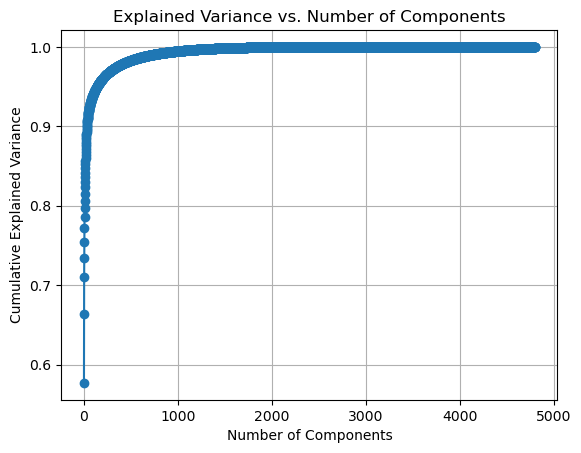

In [36]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(all_data_shuffled_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [37]:
n_components = 300
pca = PCA(n_components = n_components)
pca.fit(all_data_shuffled)
pca_tr = pca.fit_transform(all_data_shuffled_scaled)

## Model Analysis

#### Support Vector machines

Accuracy: 0.8477564102564102


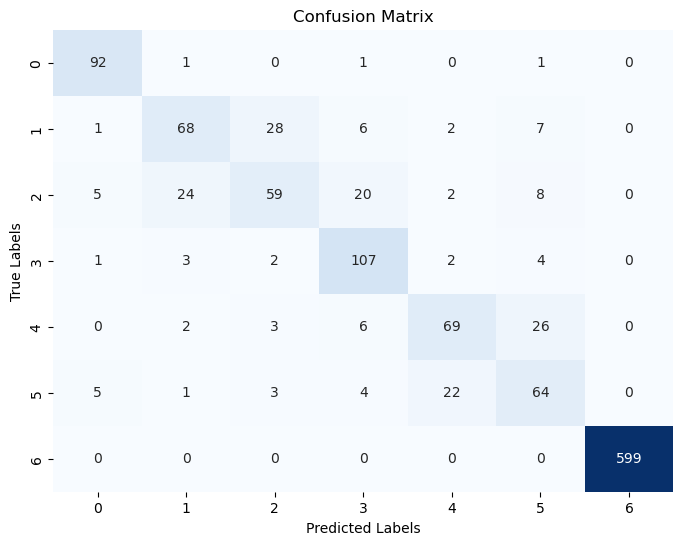

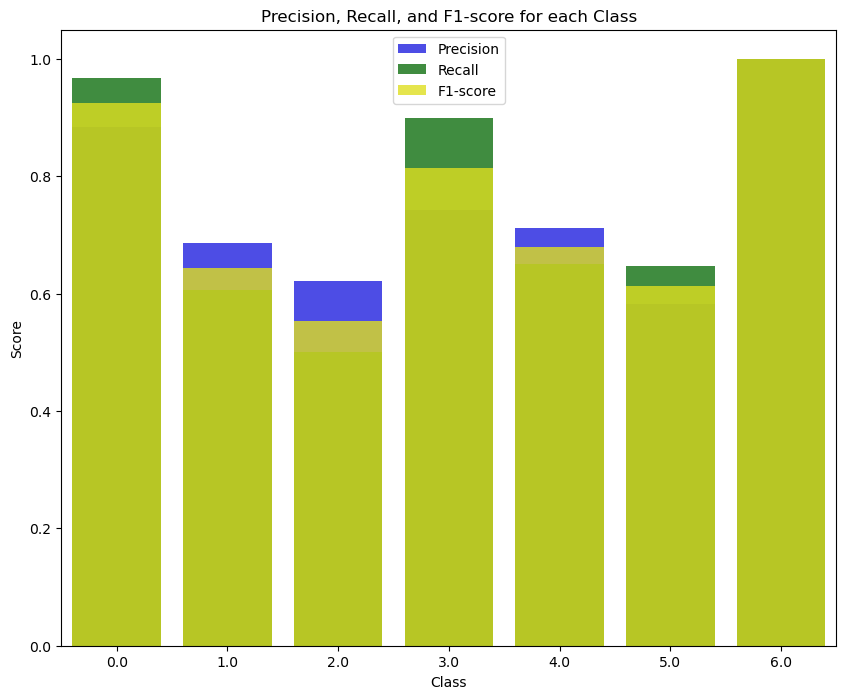

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        95
         1.0       0.69      0.61      0.64       112
         2.0       0.62      0.50      0.55       118
         3.0       0.74      0.90      0.81       119
         4.0       0.71      0.65      0.68       106
         5.0       0.58      0.65      0.61        99
         6.0       1.00      1.00      1.00       599

    accuracy                           0.85      1248
   macro avg       0.75      0.75      0.75      1248
weighted avg       0.85      0.85      0.84      1248



In [38]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
evaluate_model(model, all_data_shuffled_scaled, all_labels_shuffled)

Accuracy: 0.8325320512820513


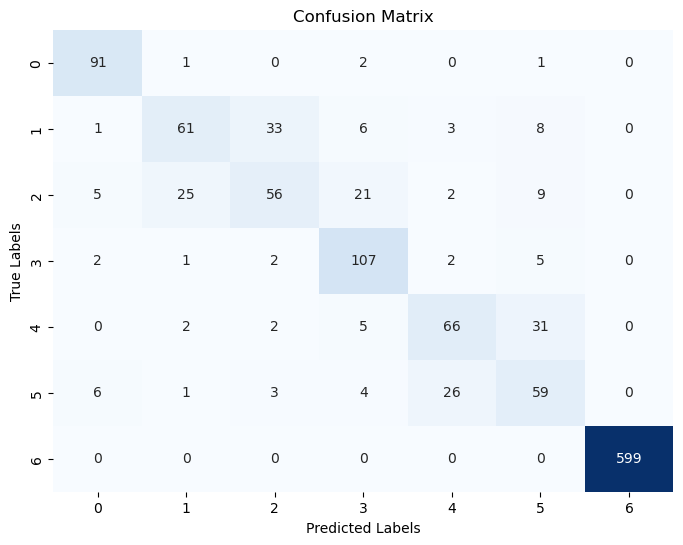

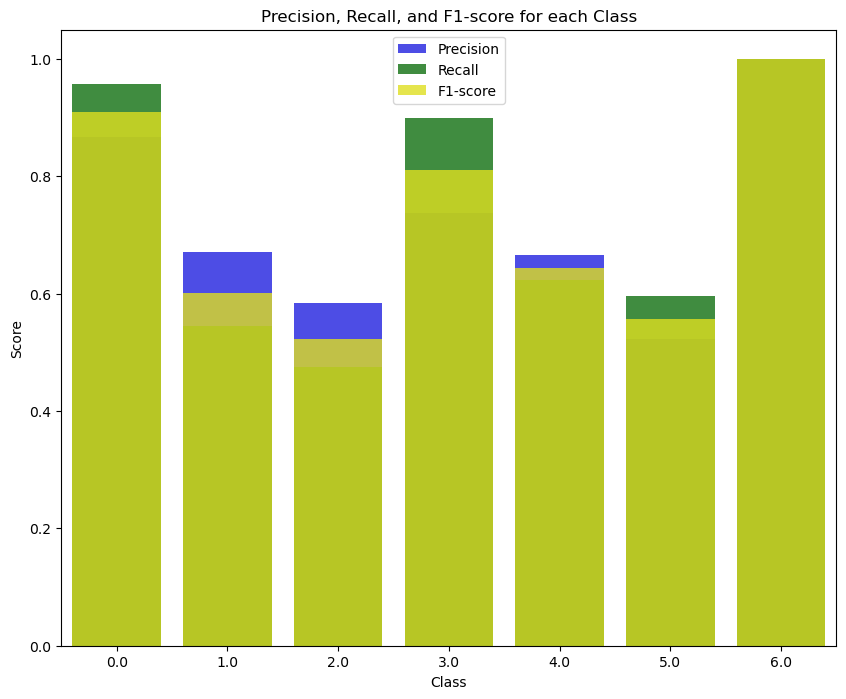

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91        95
         1.0       0.67      0.54      0.60       112
         2.0       0.58      0.47      0.52       118
         3.0       0.74      0.90      0.81       119
         4.0       0.67      0.62      0.64       106
         5.0       0.52      0.60      0.56        99
         6.0       1.00      1.00      1.00       599

    accuracy                           0.83      1248
   macro avg       0.72      0.73      0.72      1248
weighted avg       0.83      0.83      0.83      1248



In [39]:
model = SVC(kernel="rbf")
evaluate_model(model, pca_tr, all_labels_shuffled)

#### Random Forest Model


Accuracy: 0.9278846153846154


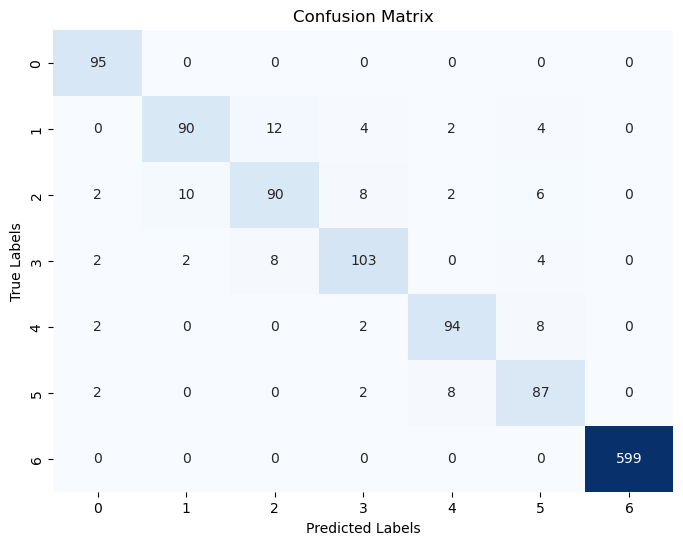

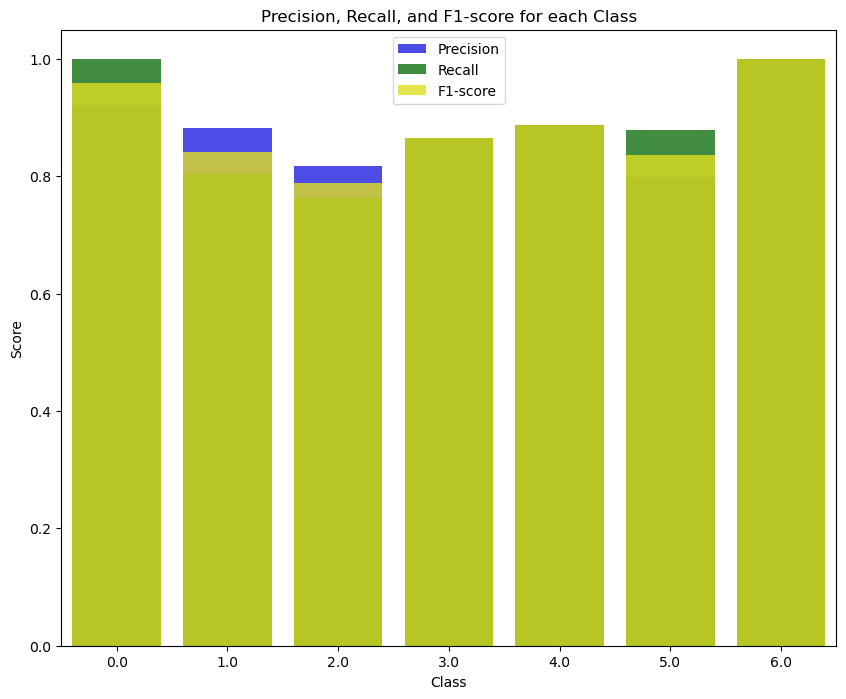

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        95
         1.0       0.88      0.80      0.84       112
         2.0       0.82      0.76      0.79       118
         3.0       0.87      0.87      0.87       119
         4.0       0.89      0.89      0.89       106
         5.0       0.80      0.88      0.84        99
         6.0       1.00      1.00      1.00       599

    accuracy                           0.93      1248
   macro avg       0.88      0.89      0.88      1248
weighted avg       0.93      0.93      0.93      1248



In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
evaluate_model(model, pca_tr, all_labels_shuffled)

#### K nearest neighbor
**n_neighbors** : A common heuristic is to use the square root of the number of data points in the dataset as the k-value. fo this case k=√3000 ≈ 54.

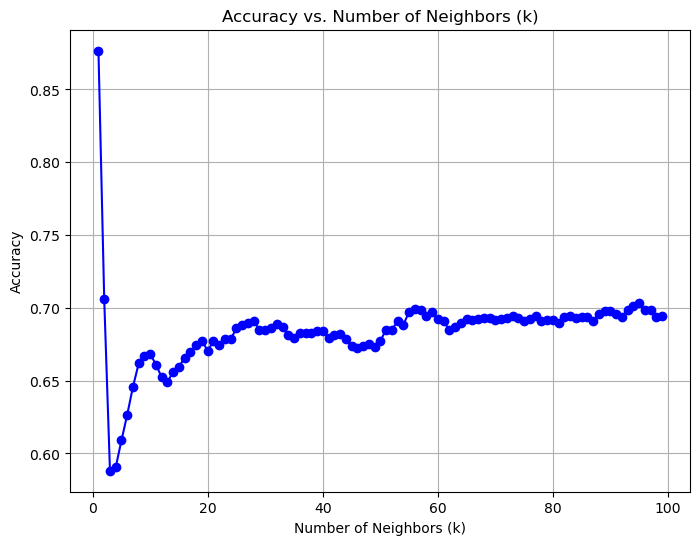

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_tr, all_labels_shuffled, test_size=0.2, random_state=42)

# Initialize lists to store accuracy scores for different k values
k_values = list(range(1, 100))
accuracy_scores = []

# Loop through different k values
for k in k_values:
    # Create and fit the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()


Accuracy: 0.6923076923076923


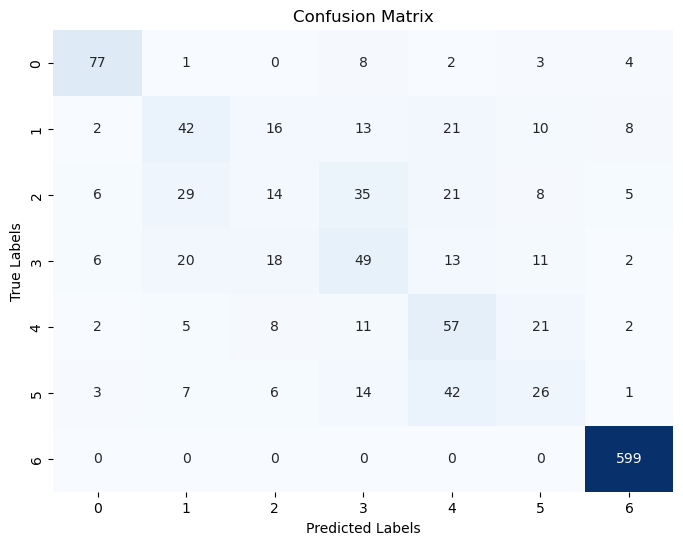

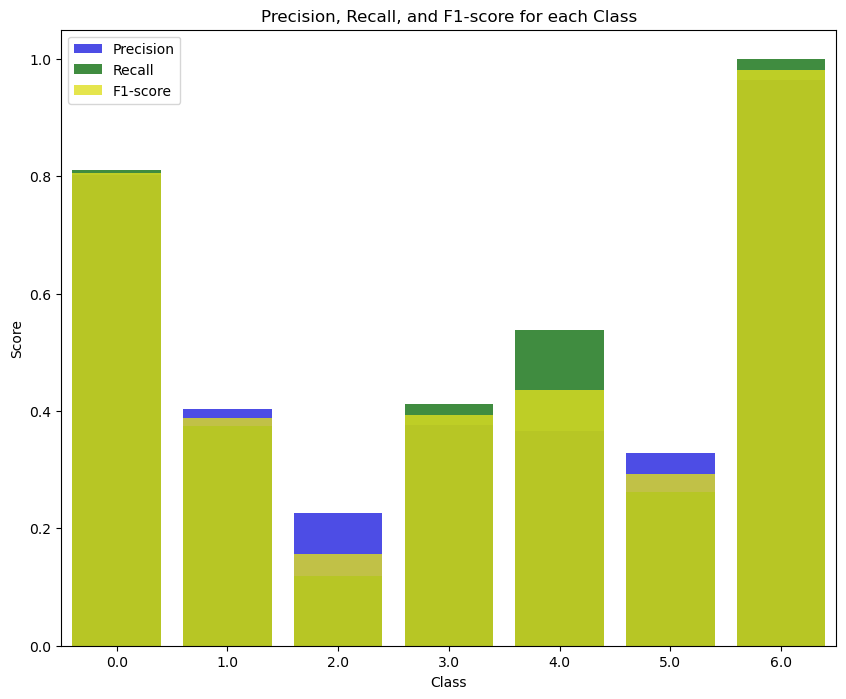

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81        95
         1.0       0.40      0.38      0.39       112
         2.0       0.23      0.12      0.16       118
         3.0       0.38      0.41      0.39       119
         4.0       0.37      0.54      0.44       106
         5.0       0.33      0.26      0.29        99
         6.0       0.96      1.00      0.98       599

    accuracy                           0.69      1248
   macro avg       0.50      0.50      0.49      1248
weighted avg       0.67      0.69      0.68      1248



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 60)
evaluate_model(model, pca_tr, all_labels_shuffled)

#### XGBoost

Accuracy: 0.905448717948718


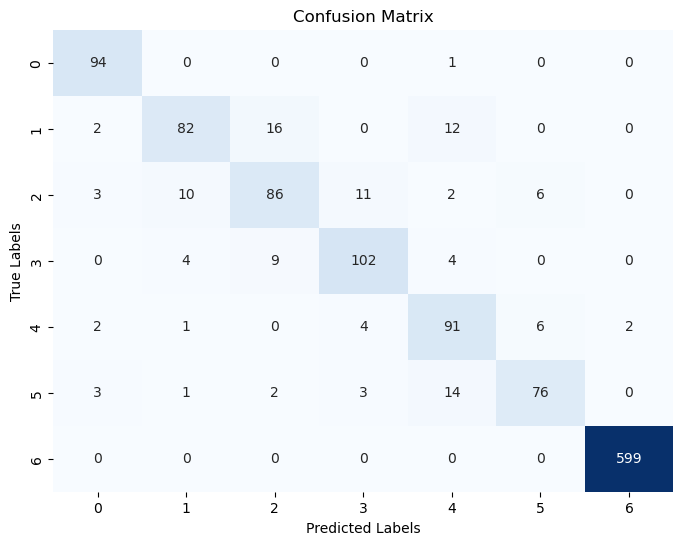

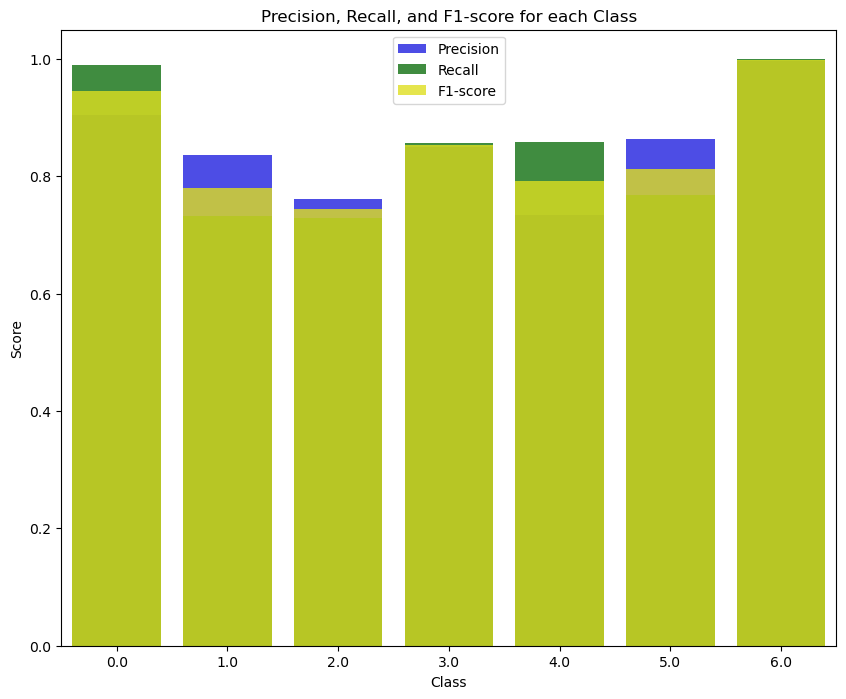

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        95
         1.0       0.84      0.73      0.78       112
         2.0       0.76      0.73      0.74       118
         3.0       0.85      0.86      0.85       119
         4.0       0.73      0.86      0.79       106
         5.0       0.86      0.77      0.81        99
         6.0       1.00      1.00      1.00       599

    accuracy                           0.91      1248
   macro avg       0.85      0.85      0.85      1248
weighted avg       0.91      0.91      0.90      1248



In [43]:
import xgboost as xgb
params = {
    'objective': 'multi:softmax',  # Multi-class classification objective
    'num_class': 7,                # Number of classes in the multi-class problem
    'eval_metric': 'mlogloss',     # Multiclass Logarithmic Loss
    'eta': 0.1,                    # Learning rate
    'max_depth': 3,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of columns when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

xgb_model = xgb.XGBClassifier(**params)
evaluate_model(xgb_model, pca_tr, all_labels_shuffled)